# Análisis de una base de datos de un histórico de ventas de un e-commerce

### Carga de librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de datos

In [62]:
root_path = 'Users/mariofranco/Documents/Diplomado/Modulo4/'
datos = pd.read_csv('ecommerce.csv', encoding = "ISO-8859-1", dtype = {'CustomerID': str,'InvoiceNo': str})

### Análisis de la data

In [3]:
datos.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/01/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 8:26,3.39,17850,United Kingdom


In [4]:
datos.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      195690 non-null object
StockCode      195690 non-null object
Description    194911 non-null object
Quantity       195690 non-null float64
InvoiceDate    195690 non-null object
UnitPrice      195690 non-null float64
CustomerID     138206 non-null object
Country        195690 non-null object
dtypes: float64(2), object(6)
memory usage: 33.1+ MB


In [6]:
datos.shape

(541909, 8)

In [7]:
datos.shape[1]

8

In [8]:
datos.columns.values.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [9]:
datos.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [10]:
datos.isnull().any().any()

True

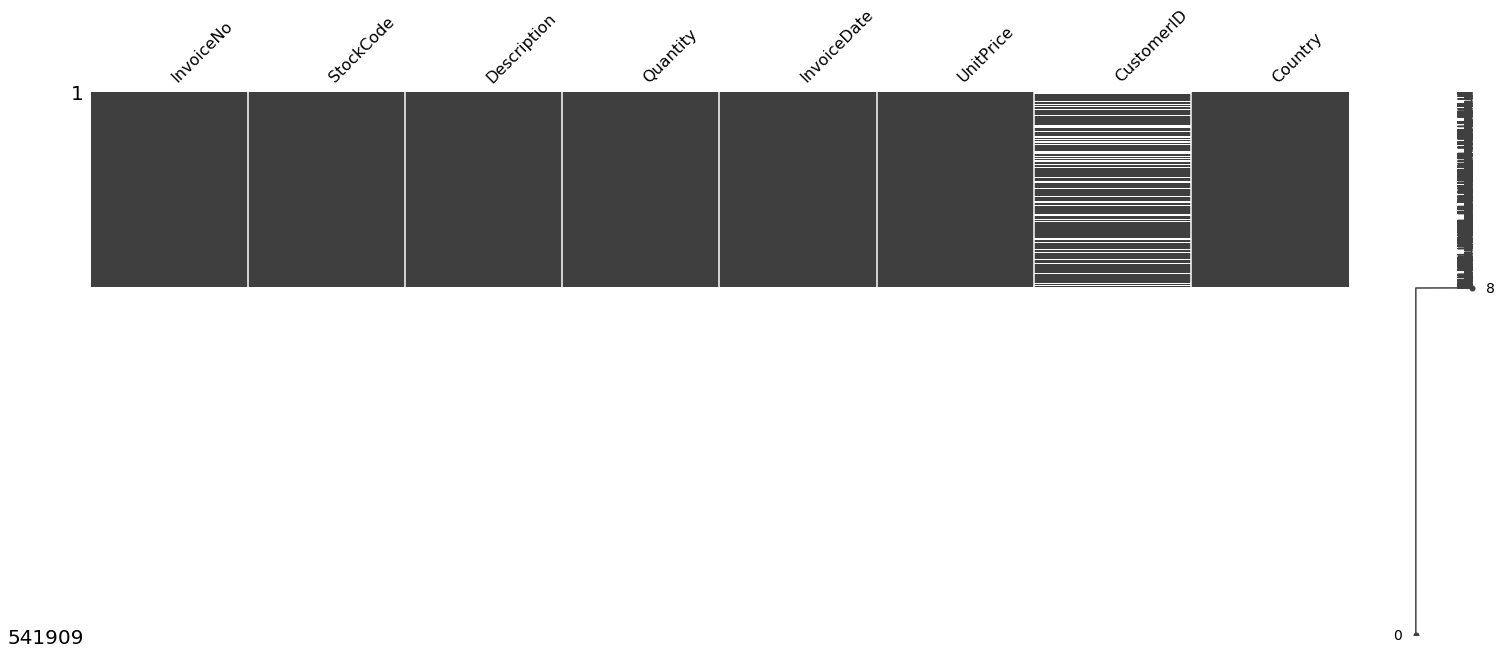

In [11]:
msno.matrix(datos)

In [12]:
datos.replace({' ': np.nan}, inplace=True)

In [13]:
datos.isnull().any().any()

True

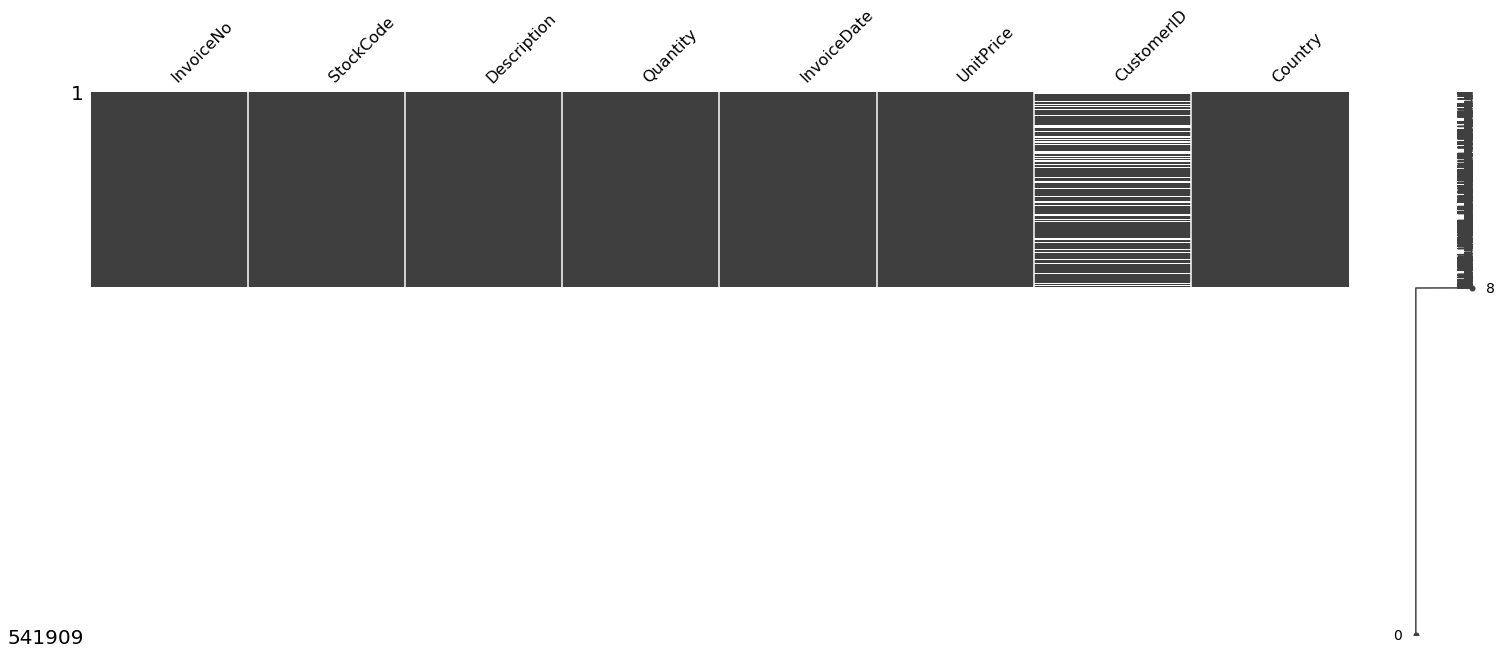

In [14]:
msno.matrix(datos)

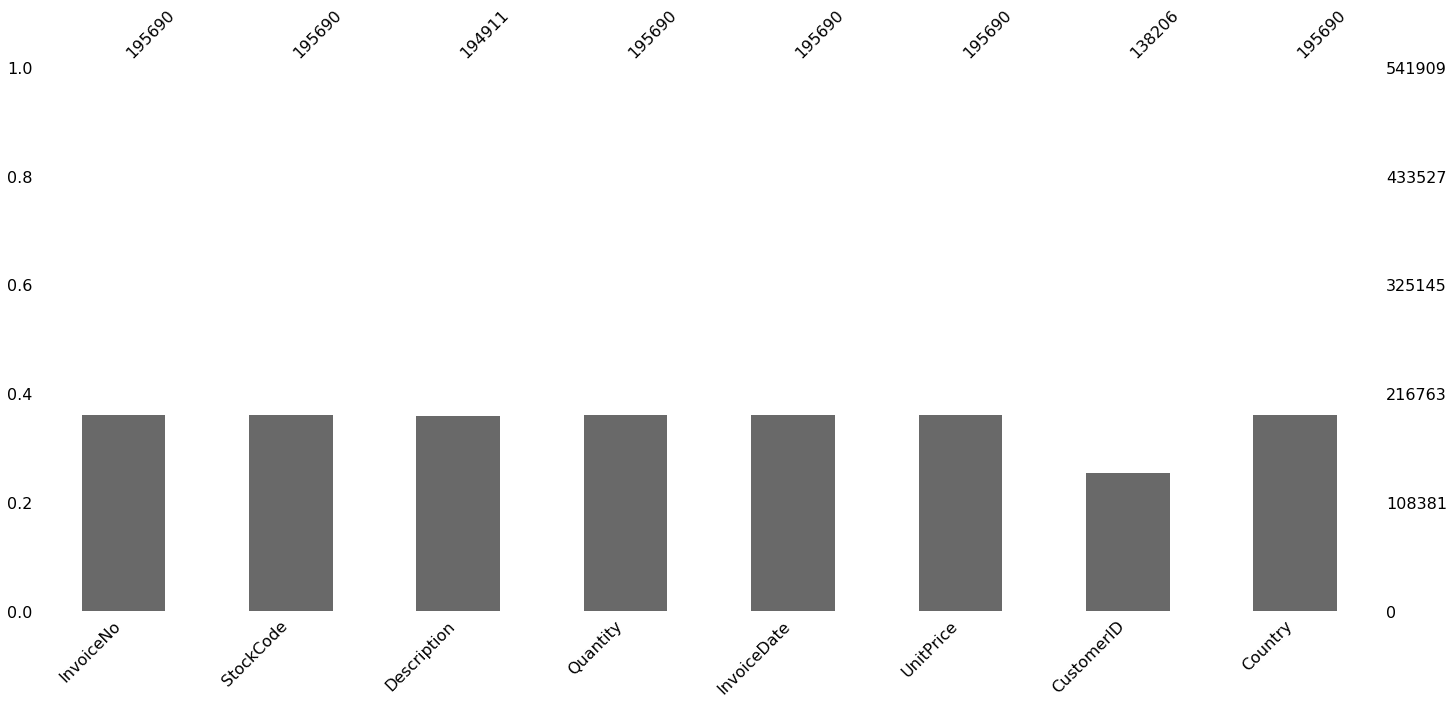

In [15]:
msno.bar(datos)

In [16]:
datos.columns[datos.isnull().any()].tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [17]:
datos.describe()

,Quantity,UnitPrice
count,195690.000000,195690.000000
mean,9.268394,5.085632
std,243.099244,97.486586
min,-74215.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,74215.000000,16888.020000


In [18]:
datos.loc[[0]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 8:26,2.55,17850,United Kingdom


In [19]:
datos.InvoiceNo.loc[[6900]]

6900    536982
Name: InvoiceNo, dtype: object

In [20]:
datos["InvoiceNo"].loc[[6900]]

6900    536982
Name: InvoiceNo, dtype: object

In [21]:
datos[["InvoiceNo", "Country"]].loc[[0]]

,InvoiceNo,Country
0,536365,United Kingdom


In [22]:
datos.loc[56:60]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
56,536373,21068,VINTAGE BILLBOARD LOVE/HATE MUG,6.0,12/01/10 9:02,1.06,17850,United Kingdom
57,536373,82483,WOOD 2 DRAWER CABINET WHITE FINISH,2.0,12/01/10 9:02,4.95,17850,United Kingdom
58,536373,82486,WOOD S/3 CABINET ANT WHITE FINISH,4.0,12/01/10 9:02,6.95,17850,United Kingdom
59,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6.0,12/01/10 9:02,2.10,17850,United Kingdom
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6.0,12/01/10 9:02,2.55,17850,United Kingdom


In [23]:
datos.drop([50,14,31], axis=0).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/01/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 8:26,3.39,17850,United Kingdom


In [24]:
datos.drop(datos.index[1:9], axis=0).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 8:26,2.55,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/01/10 8:34,1.69,13047,United Kingdom
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,12/01/10 8:34,2.10,13047,United Kingdom
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,12/01/10 8:34,2.10,13047,United Kingdom
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8.0,12/01/10 8:34,3.75,13047,United Kingdom
13,536367,22310,IVORY KNITTED MUG COSY,6.0,12/01/10 8:34,1.65,13047,United Kingdom
14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6.0,12/01/10 8:34,4.25,13047,United Kingdom
15,536367,22623,BOX OF VINTAGE JIGSAW BLOCKS,3.0,12/01/10 8:34,4.95,13047,United Kingdom
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2.0,12/01/10 8:34,9.95,13047,United Kingdom
17,536367,21754,HOME BUILDING BLOCK WORD,3.0,12/01/10 8:34,5.95,13047,United Kingdom


In [25]:
datos[100:].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
100,536378,84519A,TOMATO CHARLIE+LOLA COASTER SET,6.0,12/01/10 9:37,2.95,14688,United Kingdom
101,536378,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,48.0,12/01/10 9:37,1.25,14688,United Kingdom
102,536378,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,96.0,12/01/10 9:37,0.38,14688,United Kingdom
103,536378,21931,JUMBO STORAGE BAG SUKI,10.0,12/01/10 9:37,1.95,14688,United Kingdom
104,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,10.0,12/01/10 9:37,1.95,14688,United Kingdom


In [26]:
datos.Quantity.values

array([ 6.,  6.,  8., ..., nan, nan, nan])

In [27]:
datos[['Quantity','UnitPrice']].values

array([[6.  , 2.55],
       [6.  , 3.39],
       [8.  , 2.75],
       ...,
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]])

In [28]:
datos.UnitPrice.unique()

array([2.550000e+00, 3.390000e+00, 2.750000e+00, 7.650000e+00,
       4.250000e+00, 1.850000e+00, 1.690000e+00, 2.100000e+00,
       3.750000e+00, 1.650000e+00, 4.950000e+00, 9.950000e+00,
       5.950000e+00, 7.950000e+00, 8.500000e-01, 6.500000e-01,
       1.250000e+00, 2.950000e+00, 1.950000e+00, 4.200000e-01,
       1.800000e+01, 1.060000e+00, 6.950000e+00, 1.095000e+01,
       3.450000e+00, 5.500000e-01, 3.800000e-01, 1.450000e+00,
       3.950000e+00, 6.750000e+00, 2.750000e+01, 1.495000e+01,
       1.695000e+01, 4.650000e+00, 6.450000e+00, 1.275000e+01,
       1.995000e+01, 8.500000e+00, 3.820000e+00, 3.370000e+00,
       5.450000e+00, 6.350000e+00, 7.200000e-01, 6.400000e-01,
       1.000000e-01, 3.200000e-01, 1.480000e+00, 2.900000e-01,
       1.650000e+02, 3.575000e+01, 3.350000e+00, 1.065000e+01,
       1.500000e+01, 9.500000e-01, 2.100000e-01, 1.200000e-01,
       0.000000e+00, 2.400000e-01, 3.250000e+00, 1.490000e+00,
       2.250000e+00, 1.550000e+00, 1.895000e+01, 8.9500

In [29]:
datos.UnitPrice.nunique()

910

In [30]:
datos.UnitPrice.value_counts()

1.25       17966
0.85       12649
2.95       12319
1.65       11986
0.42        8420
           ...  
836.14         1
1126.00        1
281.00         1
208.16         1
4.79           1
Name: UnitPrice, Length: 910, dtype: int64

In [31]:
datos.agg(['count', 'size', 'nunique'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,195690,195690,194911,195690,195690,195690,138206,195690
size,541909,541909,541909,541909,541909,541909,541909,541909
nunique,9951,3498,3442,422,8968,910,2666,36


In [32]:
datos.groupby('Country').agg(['count', 'size', 'nunique']).stack()

InvoiceNo  StockCode  Description  Quantity  \
Country                                                               
Australia      count          479        479          479       479   
               size           479        479          479       479   
               nunique         29        316          318        52   
Austria        count           80         80           80        80   
               size            80         80           80        80   
...                           ...        ...          ...       ...   
United Kingdom size        180477     180477       180477    180477   
               nunique       9116       3492         3426       416   
Unspecified    count           63         63           63        63   
               size            63         63           63        63   
               nunique          2         63           63         9   

                        InvoiceDate  UnitPrice  CustomerID  
Country                                                     
Australia      count            479        479         479  
               size             479        479         479  
               nunique           29         58           8  
Austria        count             80         80          80  
               size              80         80          80  
...                             ...        ...         ...  
United Kingdom size          180477     180477      180477  
               nunique         8245        879        2418  
Unspecified    count             63         63          63  
               size              63         63          63  
               nunique            2         18           2  

[108 rows x 7 columns]

In [33]:
datos.groupby('Country').agg(['count', 'size', 'nunique'])

InvoiceNo                 StockCode                  \
                         count    size nunique     count    size nunique   
Country                                                                    
Australia                  479     479      29       479     479     316   
Austria                     80      80       9        80      80      68   
Bahrain                     15      15       3        15      15      13   
Belgium                    649     649      45       649     649     352   
Brazil                      32      32       1        32      32      32   
Canada                      11      11       2        11      11      11   
Channel Islands            252     252      10       252     252     216   
Cyprus                     306     306      11       306     306     262   
Czech Republic              17      17       2        17      17      15   
Denmark                     78      78       4        78      78      68   
EIRE                      2368    2368     103      2368    2368    1063   
European Community          11      11       1        11      11      11   
Finland                    299     299      15       299     299     267   
France                    2778    2778     165      2778    2778     844   
Germany                   3242    3242     215      3242    3242     981   
Greece                      85      85       3        85      85      85   
Hong Kong                  184     184       5       184     184     141   
Iceland                     84      84       3        84      84      63   
Israel                      38      38       4        38      38      38   
Italy                      276     276      18       276     276     224   
Japan                      245     245      18       245     245     154   
Lebanon                     45      45       1        45      45      45   
Lithuania                   35      35       4        35      35      29   
Netherlands                827     827      32       827     827     409   
Norway                     212     212      11       212     212     117   
Poland                     109     109       8       109     109      80   
Portugal                   568     568      25       568     568     325   
Saudi Arabia                10      10       2        10      10       9   
Singapore                  118     118       6       118     118      96   
Spain                      916     916      34       916     916     544   
Sweden                     165     165      18       165     165     117   
Switzerland                564     564      24       564     564     380   
USA                         22      22       1        22      22      22   
United Arab Emirates        30      30       1        30      30      30   
United Kingdom          180477  180477    9116    180477  180477    3492   
Unspecified                 63      63       2        63      63      63   

                     Description                 Quantity  ...          \
                           count    size nunique    count  ... nunique   
Country                                                    ...           
Australia                    479     479     318      479  ...      52   
Austria                       80      80      68       80  ...      19   
Bahrain                       15      15      13       15  ...       9   
Belgium                      649     649     353      649  ...      25   
Brazil                        32      32      32       32  ...       7   
Canada                        11      11      11       11  ...       6   
Channel Islands              252     252     216      252  ...      20   
Cyprus                       306     306     261      306  ...      25   
Czech Republic                17      17      15       17  ...       9   
Denmark                       78      78      68       78  ...      14   
EIRE                        2368    2368    1071     2368  ...      61   
European Community  

In [34]:
df_sample = datos.sample(frac=0.05, random_state=1)
df_sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
94801,C544414,22960,JAM MAKING SET WITH JARS,-2.0,2/18/2011 14:54,3.75,13408,United Kingdom
210111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
datos.shape

(541909, 8)

In [36]:
df_sample.shape

(27095, 8)

In [37]:
df_dropped = datos.dropna(subset=['Description'])
df_dropped.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/01/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 8:26,3.39,17850,United Kingdom


In [38]:
df_dropped.shape

(194911, 8)

In [39]:
df_copy = datos.copy()
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/01/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 8:26,3.39,17850,United Kingdom


In [40]:
df_copy.shape

(541909, 8)

In [41]:
df_dropped['UnitPrice'].dtype

dtype('float64')

In [42]:
df_dropped['UnitPrice'].mean()

5.105957544721764

In [43]:
df_copy['UnitPrice'].fillna(value=np.round(datos['UnitPrice'].mean(),decimals=2), inplace=True)

In [44]:
df_copy.agg(['count', 'size', 'nunique'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,195690,195690,194911,195690,195690,541909,138206,195690
size,541909,541909,541909,541909,541909,541909,541909,541909
nunique,9951,3498,3442,422,8968,910,2666,36


In [45]:
list(datos['Country'].unique())

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Bahrain',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 nan]

In [46]:
keys = list(datos['Country'].unique())
vals = range(1,39)
pais = dict(zip(keys,vals))
pais

{'United Kingdom': 1,
 'France': 2,
 'Australia': 3,
 'Netherlands': 4,
 'Germany': 5,
 'Norway': 6,
 'EIRE': 7,
 'Switzerland': 8,
 'Spain': 9,
 'Poland': 10,
 'Portugal': 11,
 'Italy': 12,
 'Belgium': 13,
 'Lithuania': 14,
 'Japan': 15,
 'Iceland': 16,
 'Channel Islands': 17,
 'Denmark': 18,
 'Cyprus': 19,
 'Sweden': 20,
 'Austria': 21,
 'Israel': 22,
 'Finland': 23,
 'Bahrain': 24,
 'Greece': 25,
 'Hong Kong': 26,
 'Singapore': 27,
 'Lebanon': 28,
 'United Arab Emirates': 29,
 'Saudi Arabia': 30,
 'Czech Republic': 31,
 'Canada': 32,
 'Unspecified': 33,
 'Brazil': 34,
 'USA': 35,
 'European Community': 36,
 nan: 37}

In [47]:
df_copy['pais_cat'] = datos['Country'].map(pais)
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,pais_cat
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 8:26,2.55,17850,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6.0,12/01/10 8:26,3.39,17850,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 8:26,2.75,17850,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 8:26,3.39,17850,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 8:26,3.39,17850,United Kingdom,1


In [48]:
list(df_copy['pais_cat'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37]

In [49]:
df_copy['UnitPrice'].mean()

5.0884225967770575

In [50]:
df_copy['UnitPrice'][df_copy['pais_cat'] == 9]

6421       1.65
6422       1.45
6423       1.65
6424       1.65
6425       1.45
          ...  
177105     3.75
177106     9.95
177107    12.75
177108     3.75
177109    28.00
Name: UnitPrice, Length: 916, dtype: float64

In [51]:
df_copy['UnitPrice'][df_copy['pais_cat'] == 9].mean()

7.086648471615687

In [52]:
df_copy.groupby(["pais_cat", "UnitPrice"]).count()

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  \
pais_cat UnitPrice                                                             
1        0.000           1225       1225          446      1225         1225   
         0.001              1          1            1         1            1   
         0.010              1          1            1         1            1   
         0.030              2          2            2         2            2   
         0.060              1          1            1         1            1   
...                       ...        ...          ...       ...          ...   
36       7.950              2          2            2         2            2   
         12.750             1          1            1         1            1   
         14.950             1          1            1         1            1   
         18.000             1          1            1         1            1   
37       5.090              0          0            0         0            0   

                    CustomerID  Country  
pais_cat UnitPrice                       
1        0.000               9     1225  
         0.001               1        1  
         0.010               1        1  
         0.030               2        2  
         0.060               1        1  
...                        ...      ...  
36       7.950               2        2  
         12.750              1        1  
         14.950              1        1  
         18.000              1        1  
37       5.090               0        0  

[1981 rows x 7 columns]

In [53]:
df_copy.groupby(["pais_cat"])[["UnitPrice"]].count()

,UnitPrice
pais_cat,
1,180477
2,2778
3,479
4,827
5,3242
6,212
7,2368
8,564
9,916


In [54]:
df_copy.pais_cat

0          1
1          1
2          1
3          1
4          1
          ..
541904    37
541905    37
541906    37
541907    37
541908    37
Name: pais_cat, Length: 541909, dtype: int64

In [55]:
df_sample = df_copy.sample(frac=0.05, random_state=1)
df_sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,pais_cat
94801,C544414,22960,JAM MAKING SET WITH JARS,-2.0,2/18/2011 14:54,3.75,13408,United Kingdom,1
210111,NaN,NaN,NaN,NaN,NaN,5.09,NaN,NaN,37
455946,NaN,NaN,NaN,NaN,NaN,5.09,NaN,NaN,37
403542,NaN,NaN,NaN,NaN,NaN,5.09,NaN,NaN,37
471951,NaN,NaN,NaN,NaN,NaN,5.09,NaN,NaN,37


In [56]:
df_sample.groupby(["pais_cat"])[["UnitPrice"]].agg([np.sum, np.mean,np.count_nonzero])

UnitPrice                          
               sum        mean count_nonzero
pais_cat                                    
1         34989.62    3.906836        8893.0
2           522.46    3.530135         148.0
3            43.61    3.634167          12.0
4            87.57    2.085000          42.0
5           453.06    3.406466         133.0
6            18.02    2.002222           9.0
7           463.89    3.741048         124.0
8            97.18    3.737692          26.0
9           143.28    4.093714          35.0
10           16.98    3.396000           5.0
11          115.54    4.621600          25.0
12           12.50    1.562500           8.0
13          117.17    3.779677          31.0
14            7.20    3.600000           2.0
15           38.05    2.002632          19.0
16           15.80    2.633333           6.0
17           23.42    3.345714           7.0
18            6.70    3.350000           2.0
19           55.27    3.684667          15.0
20           43.19   10.797500           4.0
21           19.62    2.802857           7.0
22           13.41    4.470000           3.0
23           43.39    3.337692          13.0
24            9.95    9.950000           1.0
25           12.03    3.007500           4.0
26           21.00    2.625000           8.0
27         2066.38  344.396667           6.0
28            3.75    3.750000           1.0
29            1.25    1.250000           1.0
30            3.37    1.685000           2.0
31            3.80    1.900000           2.0
33            2.10    2.100000           1.0
34           17.04    4.260000           4.0
36            6.75    6.750000           1.0
37        88728.88    5.090000       17432.0

In [57]:
df_sample.groupby(["pais_cat"]).agg({'UnitPrice':np.mean,'Quantity':np.max})

,UnitPrice,Quantity
pais_cat,,
1,3.906836,2000.0
2,3.530135,576.0
3,3.634167,432.0
4,2.085000,432.0
5,3.406466,144.0
6,2.002222,48.0
7,3.741048,144.0
8,3.737692,72.0
9,4.093714,144.0


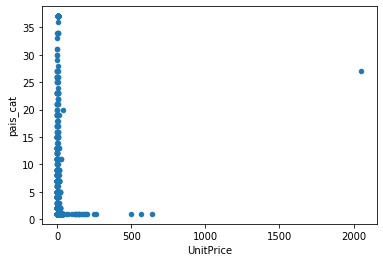

In [58]:
df_sample['UnitPrice'] = df_sample['UnitPrice'].astype('int64')
df_sample.plot(kind='scatter',x='UnitPrice',y='pais_cat')

Text(0.5, 1.0, 'Frecuencia de Pais')

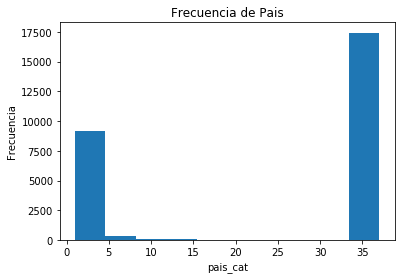

In [59]:
plt.hist(df_sample['pais_cat'])
plt.xlabel('pais_cat')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Pais')

Text(0.5, 1.0, 'Frecuencia de Precio')

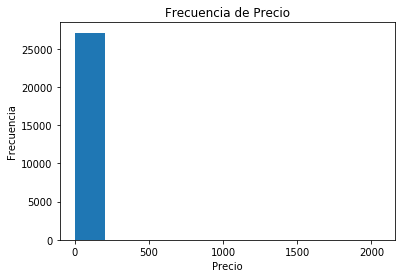

In [60]:
plt.hist(df_sample['UnitPrice'])
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Precio')

Text(0.5, 1.0, 'Box Plot de Precio.count')

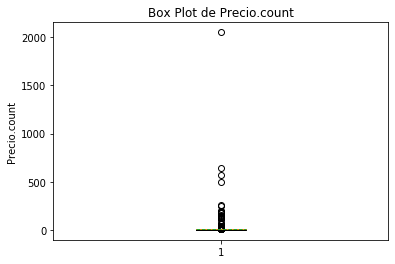

In [61]:
plt.boxplot(df_sample['UnitPrice'], showmeans=True, meanline=True)
plt.ylabel('Precio.count')
plt.title('Box Plot de Precio.count')